# Data Visualization

In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [4]:
census_pop_csv = pd.read_csv("CensusTotalPopulation_perH.csv")
county_csv = pd.read_csv("countydata.csv")
white_csv = pd.read_csv("whitedata.csv")
black_csv = pd.read_csv("blackdata.csv")
hispanic_csv = pd.read_csv("hispanicdata.csv")
asian_csv = pd.read_csv("asiandata.csv")
indian_csv = pd.read_csv("indiandata.csv")
states = pd.read_csv("state_abbreviations.csv")

fasttop_csv = pd.read_csv("Top10.csv")
fastbottom_csv = pd.read_csv("bottom10.csv")
hospital_csv = pd.read_csv("hospitals.csv")

FileNotFoundError: File b'CensusTotalPopulation_perH.csv' does not exist

In [45]:
census = census_pop_csv[["CountyName", "State", "white_perh", "black_perh", "amerind_perh", 
                         "asian_perh", "nathaw_perh", "multi_perh", "hisp_perh"]]
census = census.rename(columns = {"CountyName" : "County"})
white = white_csv[["County", "State", "Value", "Race/Ethnicity", "Lat", "Lng"]]
white = white.rename(columns = {"Value" : "white_val"})

black = black_csv[["County", "State", "Value", "Race/Ethnicity"]]
black = black.rename(columns = {"Value" : "black_val"})

asian = asian_csv[["County", "State", "Value", "Race/Ethnicity"]]
asian = asian.rename(columns = {"Value" : "asian_val"})

hispanic = hispanic_csv[["County", "State", "Value", "Race/Ethnicity"]]
hispanic = hispanic.rename(columns = {"Value" : "hisp_val"})

indian = indian_csv[["County", "State", "Value", "Race/Ethnicity"]]
indian = indian.rename(columns = {"Value" : "amerind_val"})

In [46]:
composite = pd.merge(census, white, how = "inner", on = ["County", "State"])

In [48]:
composite = pd.merge(composite, black, how = "inner", on = ["County", "State"])

In [50]:
composite = pd.merge(composite, asian, how = "inner", on = ["County", "State"])

In [52]:
composite = pd.merge(composite, hispanic, how = "inner", on = ["County", "State"])

In [54]:
composite = pd.merge(composite, indian, how = "inner", on = ["County", "State"])

In [57]:
avg_ethnic = composite[["white_perh", "black_perh", "amerind_perh", "asian_perh", "hisp_perh", 
                        "white_val", "black_val", "asian_val", "hisp_val", "natamer_val"]].mean()

In [115]:
composite

,County,State,white_perh,black_perh,amerind_perh,asian_perh,nathaw_perh,multi_perh,hisp_perh,white_val,...,Lat,Lng,black_val,Race/Ethnicity_y,asian_val,Race/Ethnicity_x,hisp_val,Race/Ethnicity_y,amerind_val,Race/Ethnicity
0,Los Angeles County,CA,53431.166380,8344.055159,545.497219,13979.553053,261.414371,3888.481115,48129.068558,350.9,...,34.322796,-118.221787,474.2,Black,190.5,Asian and Pacific Islander,232.1,Hispanic,311.2,American Indian and Alaskan Native
1,Madera County,CA,82537.454412,3530.291502,1500.144308,2187.573794,166.609818,3351.874688,55105.213444,362.7,...,37.212682,-119.747330,486.2,Black,227.3,Asian and Pacific Islander,241.8,Hispanic,301.4,American Indian and Alaskan Native
2,Mariposa County,CA,88320.517107,863.702218,3332.218879,1292.767190,412.348156,3555.109774,9634.458932,350.5,...,37.575843,-119.896002,456.2,Black,216.8,Asian and Pacific Islander,239.8,Hispanic,250.5,American Indian and Alaskan Native
3,Mendocino County,CA,82341.460074,804.684290,4758.480573,1791.991965,212.299685,3772.314295,23206.866639,333.9,...,39.436309,-123.377828,356.3,Black,178.7,Asian and Pacific Islander,195.3,Hispanic,299.2,American Indian and Alaskan Native
4,Merced County,CA,64521.480530,3484.207348,773.673689,7584.601447,218.646912,3942.142663,56293.934842,400.5,...,37.186923,-120.704731,479.3,Black,178.8,Asian and Pacific Islander,227.2,Hispanic,291.4,American Indian and Alaskan Native
5,Modoc County,CA,89941.081950,1156.936261,2528.119979,557.043385,0.000000,4413.497590,14408.141403,374.9,...,41.583941,-120.718904,439.4,Black,211.4,Asian and Pacific Islander,205.5,Hispanic,393.8,American Indian and Alaskan Native
6,Mono County,CA,84499.401113,443.880786,2677.376171,817.304305,930.035933,1683.928697,27076.727964,283.2,...,37.933321,-118.882552,422.7,Black,235.9,Asian and Pacific Islander,238.7,Hispanic,267.5,American Indian and Alaskan Native
7,Monterey County,CA,75269.163880,2783.066268,979.227020,6235.659301,513.735300,3671.924825,56456.991436,251.1,...,36.216903,-121.227026,282.5,Black,196.1,Asian and Pacific Islander,185.6,Hispanic,294.3,American Indian and Alaskan Native
8,Napa County,CA,77228.497770,2148.607211,499.809699,7441.132327,255.649789,3554.681048,32988.158244,300.8,...,38.508289,-122.327344,319.5,Black,176.4,Asian and Pacific Islander,158.4,Hispanic,249.4,American Indian and Alaskan Native
9,Nevada County,CA,92626.209358,363.061071,991.826055,1496.866316,167.332617,2699.632882,8874.713506,234.5,...,39.295924,-120.761996,407.7,Black,185.3,Asian and Pacific Islander,207.2,Hispanic,362.8,American Indian and Alaskan Native


# Lets Start plotting some sh*t

Heat of fast food

Heat of hospitals

pie chart of mortality by ethnicity

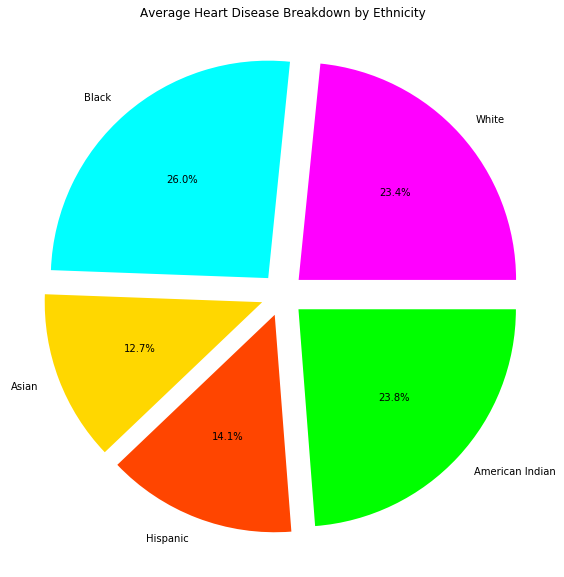

In [59]:
col = ["fuchsia", "cyan", "gold", "orangered", "lime"]
fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1 = plt.pie(avg_ethnic[5:11], 
        labels = ["White", "Black", "Asian", "Hispanic", "American Indian"],
        explode = (.1,.1,.1,.1,.1), 
        colors = col, autopct='%.1f%%')
fig1, plt.title("Average Heart Disease Breakdown by Ethnicity")
plt.show(fig1)


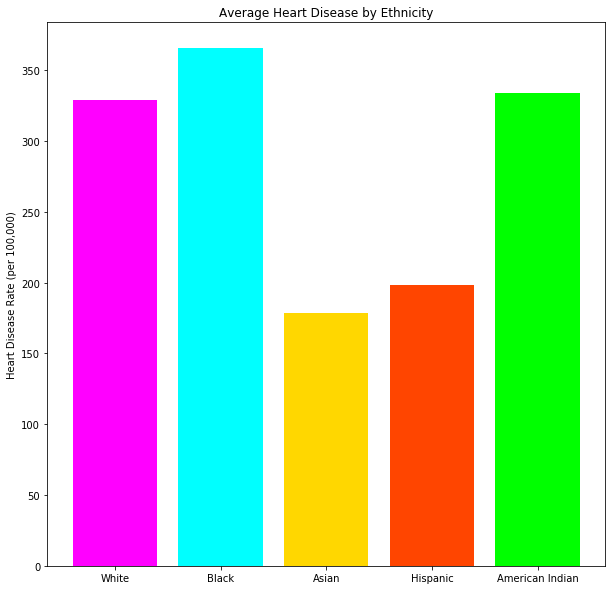

In [60]:
col = ["fuchsia", "cyan", "gold", "orangered", "lime"]
fig2, ax1 = plt.subplots(figsize=(10, 10))
fig2 = plt.bar(height = avg_ethnic[5:11], 
        x = ["White", "Black", "Asian", "Hispanic", "American Indian"],
        color = col)
fig2, plt.title("Average Heart Disease by Ethnicity")
fig2, plt.ylabel("Heart Disease Rate (per 100,000)")
plt.show(fig2)

pie chart of ethnic breakdown

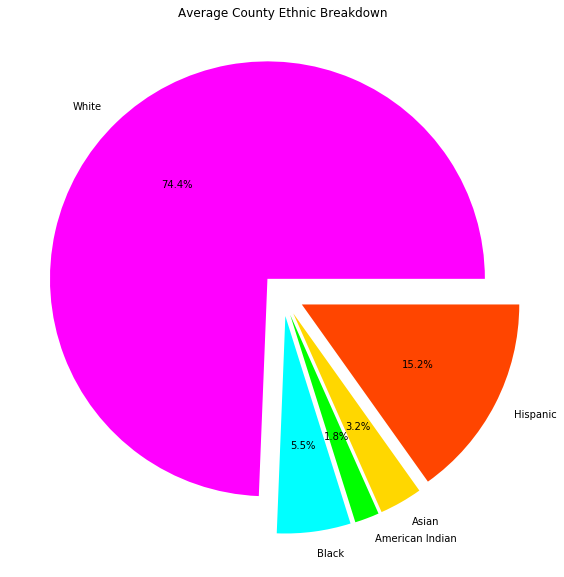

In [62]:
col = ["fuchsia", "cyan", "lime", "gold", "orangered" ]
fig3, ax1 = plt.subplots(figsize=(10, 10))
fig3 = plt.pie(avg_ethnic[0:5], 
        labels = ["White", "Black", "American Indian", "Asian", "Hispanic"],
        explode = (.1,.1,.1,.1,.1), 
        colors = col, autopct='%.1f%%')
fig3, plt.title("Average County Ethnic Breakdown")
plt.show(fig3)


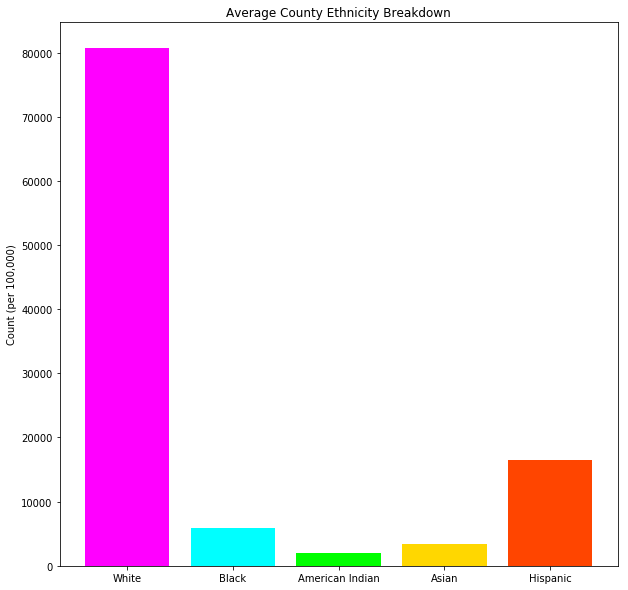

In [63]:
col = ["fuchsia", "cyan", "lime", "gold", "orangered" ]
fig4, ax1 = plt.subplots(figsize=(10, 10))
fig4 = plt.bar(height = avg_ethnic[0:5], 
        x = ["White", "Black", "American Indian", "Asian", "Hispanic"],
        color = col)
fig4, plt.title("Average County Ethnicity Breakdown")
fig4, plt.ylabel("Count (per 100,000)")
plt.show(fig4)

y=-24.608295x+(88794.134967)


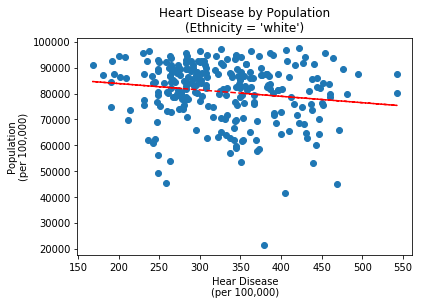

In [76]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# White Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.white_val
y = composite.white_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'White')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=16.906623x+(-238.446813)


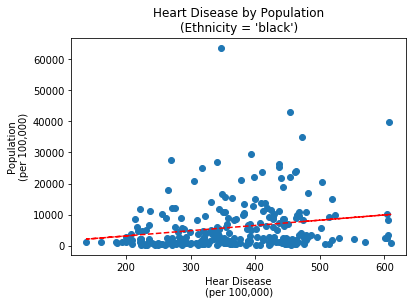

In [77]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# Black Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.black_val
y = composite.black_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Black')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=3.161019x+(909.464381)


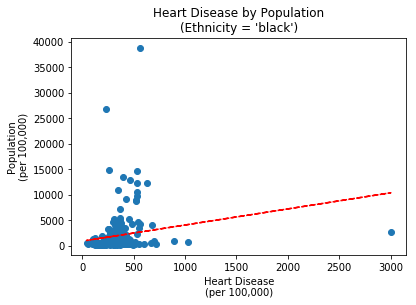

In [82]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# American Indian Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.amerind_val
y = composite.amerind_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'American Indian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()


In [100]:
# There's some potential outliers in american indian values
AI = pd.DataFrame(composite[["amerind_val", "amerind_perh"]])
AI = AI.sort_values(by = ["amerind_val"], ascending = False)
# Remove the first outlier
AI = AI[1:]

AI = AI.sort_values(by = ["amerind_perh"], ascending = False)
# Remove the second 2 outliers
AI =AI[2:]

y=6.313863x+(-319.193250)


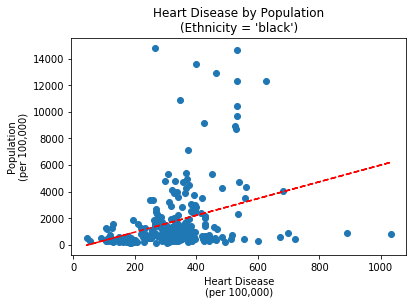

In [101]:
x = AI["amerind_val"]
y = AI["amerind_perh"]
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'American Indian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=-8.155429x+(4914.854652)


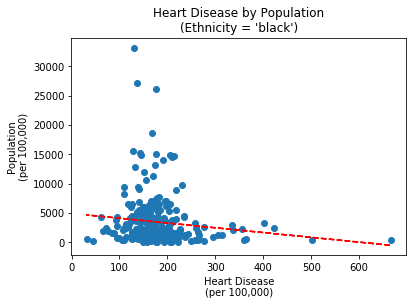

In [102]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# Asian Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.asian_val
y = composite.asian_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Asian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

In [104]:
# Again, some potential outliers. Must remove.
AS = pd.DataFrame(composite[["asian_val", "asian_perh"]])
AS = AS.sort_values(by = ["asian_val"], ascending = False)
# Remove the first outlier
AS = AS[1:]

AS = AS.sort_values(by = ["asian_perh"], ascending = False)
# Remove the second 2 outliers
AI =AI[3:]

y=-8.643521x+(4997.726922)


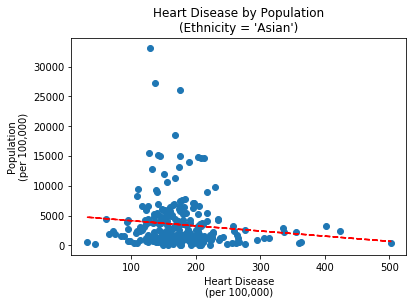

In [105]:
x = AS["asian_val"]
y = AS["asian_perh"]
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Asian')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

y=35.402260x+(9428.809007)


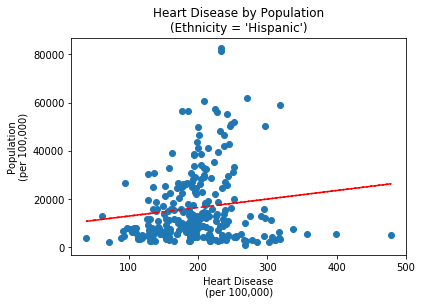

In [106]:
#~~~~~~~~~~~~~~~~~~~~~~~~
# Hispanic Scatter
#~~~~~~~~~~~~~~~~~~~~~~~~
x = composite.hisp_val
y = composite.hisp_perh
plt.scatter(x, y)
plt.title("Heart Disease by Population\n(Ethnicity = 'Hispanic')")
plt.xlabel("Heart Disease\n(per 100,000)")
plt.ylabel("Population\n(per 100,000)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

# Quick chi-square tests

In [119]:
# we have all the average values for population by ethnicity and heart disease by ethnicity. 
# If we convert them into proportions, then we can directly compare the two sets of proportions
# to see if they are similar or not. 
composite["poptot"] = ""
composite.poptot = sum(composite[["white_perh", "black_perh", "amerind_perh", 
                                  "asian_perh", "hisp_perh", "nathaw_perh", "multi_perh"]].astype(int))


# stats.chisquare(avg_ethnic[0:5], avg_ethnic[5:11])


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [120]:
composite.head()

,County,State,white_perh,black_perh,amerind_perh,asian_perh,nathaw_perh,multi_perh,hisp_perh,white_val,...,Lng,black_val,Race/Ethnicity_y,asian_val,Race/Ethnicity_x,hisp_val,Race/Ethnicity_y,amerind_val,Race/Ethnicity,poptot
0,Los Angeles County,CA,53431.166380,8344.055159,545.497219,13979.553053,261.414371,3888.481115,48129.068558,350.9,...,-118.221787,474.2,Black,190.5,Asian and Pacific Islander,232.1,Hispanic,311.2,American Indian and Alaskan Native,
1,Madera County,CA,82537.454412,3530.291502,1500.144308,2187.573794,166.609818,3351.874688,55105.213444,362.7,...,-119.747330,486.2,Black,227.3,Asian and Pacific Islander,241.8,Hispanic,301.4,American Indian and Alaskan Native,
2,Mariposa County,CA,88320.517107,863.702218,3332.218879,1292.767190,412.348156,3555.109774,9634.458932,350.5,...,-119.896002,456.2,Black,216.8,Asian and Pacific Islander,239.8,Hispanic,250.5,American Indian and Alaskan Native,
3,Mendocino County,CA,82341.460074,804.684290,4758.480573,1791.991965,212.299685,3772.314295,23206.866639,333.9,...,-123.377828,356.3,Black,178.7,Asian and Pacific Islander,195.3,Hispanic,299.2,American Indian and Alaskan Native,
4,Merced County,CA,64521.480530,3484.207348,773.673689,7584.601447,218.646912,3942.142663,56293.934842,400.5,...,-120.704731,479.3,Black,178.8,Asian and Pacific Islander,227.2,Hispanic,291.4,American Indian and Alaskan Native,


mortality rate by number of hospitals

motrality rate by fast food